In [1]:
%load_ext pyinstrument
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import tqdm
import copy

local


In [2]:
#%%pyinstrument
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

(1099, 1)

In [3]:
import gp
import ariel_gp
import ariel_load_FGS
import ariel_model
import ariel_simple
import ariel_simple2
importlib.reload(ariel_load_FGS)
importlib.reload(ariel_load)
kgs.profiling=False
kgs.debugging_mode=1
kgs.sanity_checks_active=False
importlib.reload(gp)
importlib.reload(ariel_gp)
model = ariel_gp.PredictionModel()  
model.run_in_parallel=False
#model.model_options.use_training_labels = False
#model.starter_model.do_plots = True
model.plot_final = True
model.plot_simple = False
#model.model_options.include_background = False
#model.model_options.n_iter = 4
model.train(train_data)
#model.starter_model.loaders[0].cache_steps = [5]

for ii in range(2):                
    pass
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca = True                 
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[3] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[2] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[4] = True
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
#model.loaders[1].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[1] = 1
#model.loaders[0].cache_steps = []
#model.starter_model.loaders = model.loaders

model = ariel_model.baseline_model()
model.model.run_in_parallel = True
#model.model.run_in_parallel = True
model.model.starter_model=ariel_simple2.SimpleModelChainer()
model.model.starter_model.model.order_list = [1,2,3]
model.model.starter_model.model.do_regularization = True
def modify_func(model, cc):
        model.m['signal'].m['main'].m['transit'].cov_override = cc[0]
        model.m['signal'].m['main'].m['transit'].mu_override = cc[1]
        # cur_params = model.m['signal'].m['main'].m['transit'].get_parameters()
        # cur_params[-model.m['signal'].m['main'].m['transit'].number_of_extra_parameters:,0] = cc[1]
        # model.m['signal'].m['main'].m['transit'].set_parameters(cur_params)
        return model
#model.model.model_options.modify_func = modify_func
#model.model.model_options.modify_func_input = kgs.dill_load(kgs.calibration_dir + 'transit_model_tuning9.pickle')    
model.model.starter_model.model.force_kepler = False
model=model.model
model.run_in_parallel = False

model.train(train_data)
# model.run_in_parallel = False
# model.plot_final = True

loaders = model.starter_model.loaders
#model.model_options.n_iter = 40
#model.model_options.unregularize_transit = False
#model.model_options.transit_std_scaling = 1.
#model.model_options.common_parameters = [1,2,3]
model.model_options.use_training_labels = True
#model.model_options.FGS_noise_scaling = 0.1
#model.model_options.AIRS_noise_scaling = 0.1
model.model_options.include_background = False
model.plot_final = True
# model.starter_model.new_solver = True
# model.starter_model.unlock_t0 = True
#model.starter_model.transit_param[0].supersample_factor = 50
#loaders[1].noise_scaling = 1e4
#model.model_options.supersample_override[0]=50
model.model_options.FGS_transit_override = ('nonlinear',4)
model.model_options.AIRS_transit_override = ('nonlinear',4)
#loaders[0].cache_steps= []
# loaders[0].apply_wavelength_binning = ariel_load_FGS.ApplyWavelengthBinningFGS2()
# loaders[0].apply_wavelength_binning.n_mean_pixels = 0
# loaders[0].apply_pixel_corrections.mask_hot = False
# loaders[0].apply_full_sensor_corrections.inpainting_2d = True
# loaders[0].apply_full_sensor_corrections.restore_invalids = True
# loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
# old_weights = copy.deepcopy(ariel_load_FGS.FGS_weights)
# ariel_load_FGS.FGS_weights *= 0
# ariel_load_FGS.FGS_weights[0,0] = old_weights[0,0]
#print(ariel_load_FGS.FGS_weights)
#ariel_load_FGS.FGS_weights[3] = 1
#model.model_options.FGS_order = 3
#model.model_options.AIRS_order = 3
#loaders[0].apply_wavelength_binning.options.use_sum = True
# loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
# loaders[1].apply_pixel_corrections.mask_hot = False
# loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
# loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
# loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
# loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
# loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
# loaders[1].apply_wavelength_binning.residual_threshold = np.inf
# loaders[1].apply_wavelength_binning.sequential_fit = True


            
#model.loaders[0].cache_steps = [5]
#data = [train_data[[d.planet_id for d in train_data].index(1856672295)]] # ingress and egress obscured
#1349926825
data = train_data[:10]
data = [train_data[817]]
data = [train_data[521]]
data = [train_data[667]]
#data = [train_data[0]]
print(data[0].planet_id)
#data = [train_data[[d.planet_id for d in train_data].index(30428978)]]
#data = train_data[1003:1004]
#data = [train_data[[d.planet_id for d in train_data].index(2270815333)]] # ingress and egress obscured
data= copy.deepcopy(data)
for d in data:
    d.load_to_step(5,model.loaders)
    # d.transits = d.transits[1:]
    # for ii in range(2):
    #     d.transits[0].data[ii].data = d.transits[0].data[ii].data[100:,...]
    #     d.transits[0].data[ii].times = d.transits[0].data[ii].times[100:,...]
    #     d.transits[0].data[ii].time_intervals = d.transits[0].data[ii].time_intervals[100:,...]
    #for ii in range(2):
    #d.transit_params.derivative_step_size = 1e1
    
#     #d.transit_params[0].supersample_factor = 50
#     d.transits = d.transits[:1]
#     print(d.transit_params)
#     #d.transit_params = copy.deepcopy(train_data[2].transit_params)
#     #d.transits[0].data[0].data-=5000
    #d.transits[0].data[1].noise_est*=1000
#print('!!!')
#d.transits = d.transits[1:]
#%pyinstrument inferred_data = model.infer(data)
inferred_data = model.infer(data)
kgs.score_metric(inferred_data, data)
# model.starter_model.do_plots = False
# inferred_data_simple = model.starter_model.infer(data)
# kgs.score_metric(inferred_data_simple, data)

2554492145


KeyboardInterrupt: 

In [ ]:
25000/32/32

0.657684869822408
-6.232815150783389
-6.5379986319113526


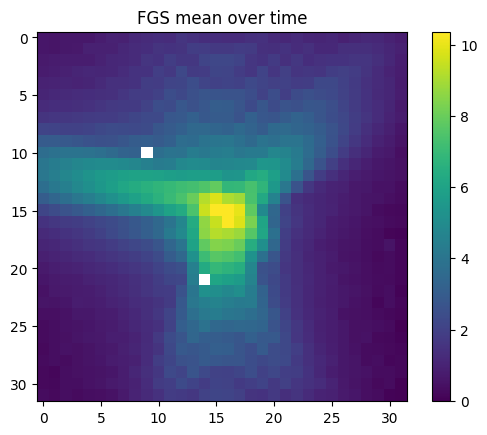

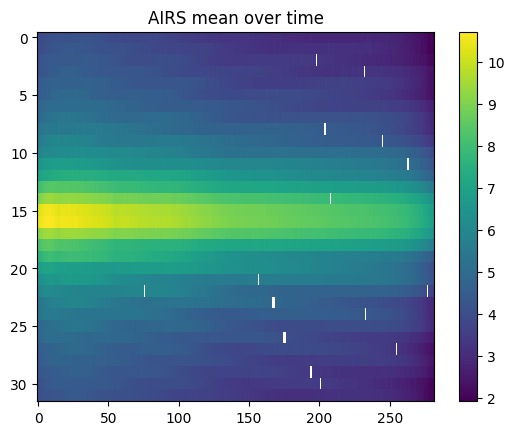

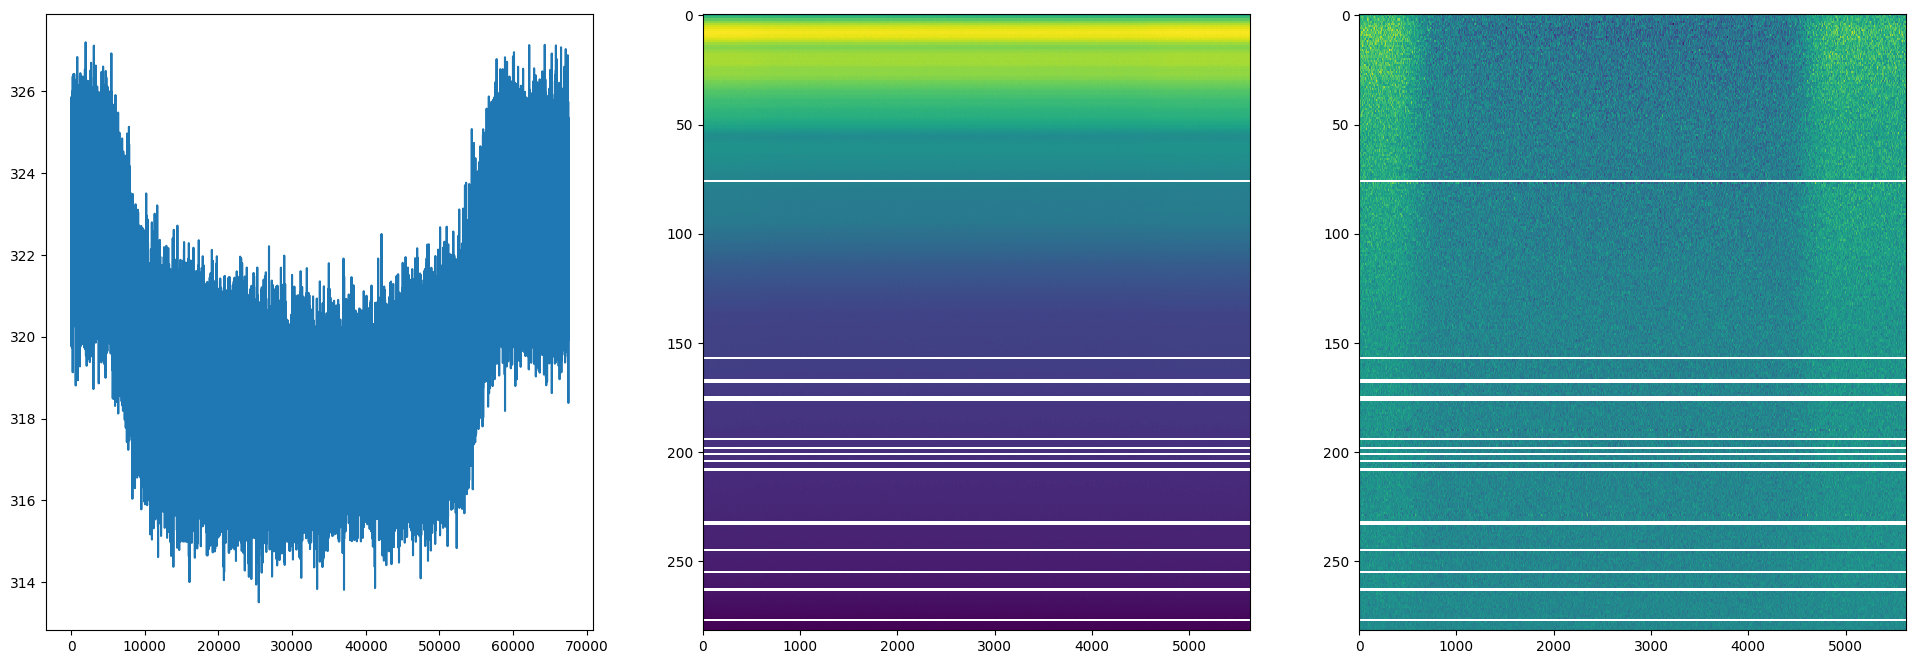

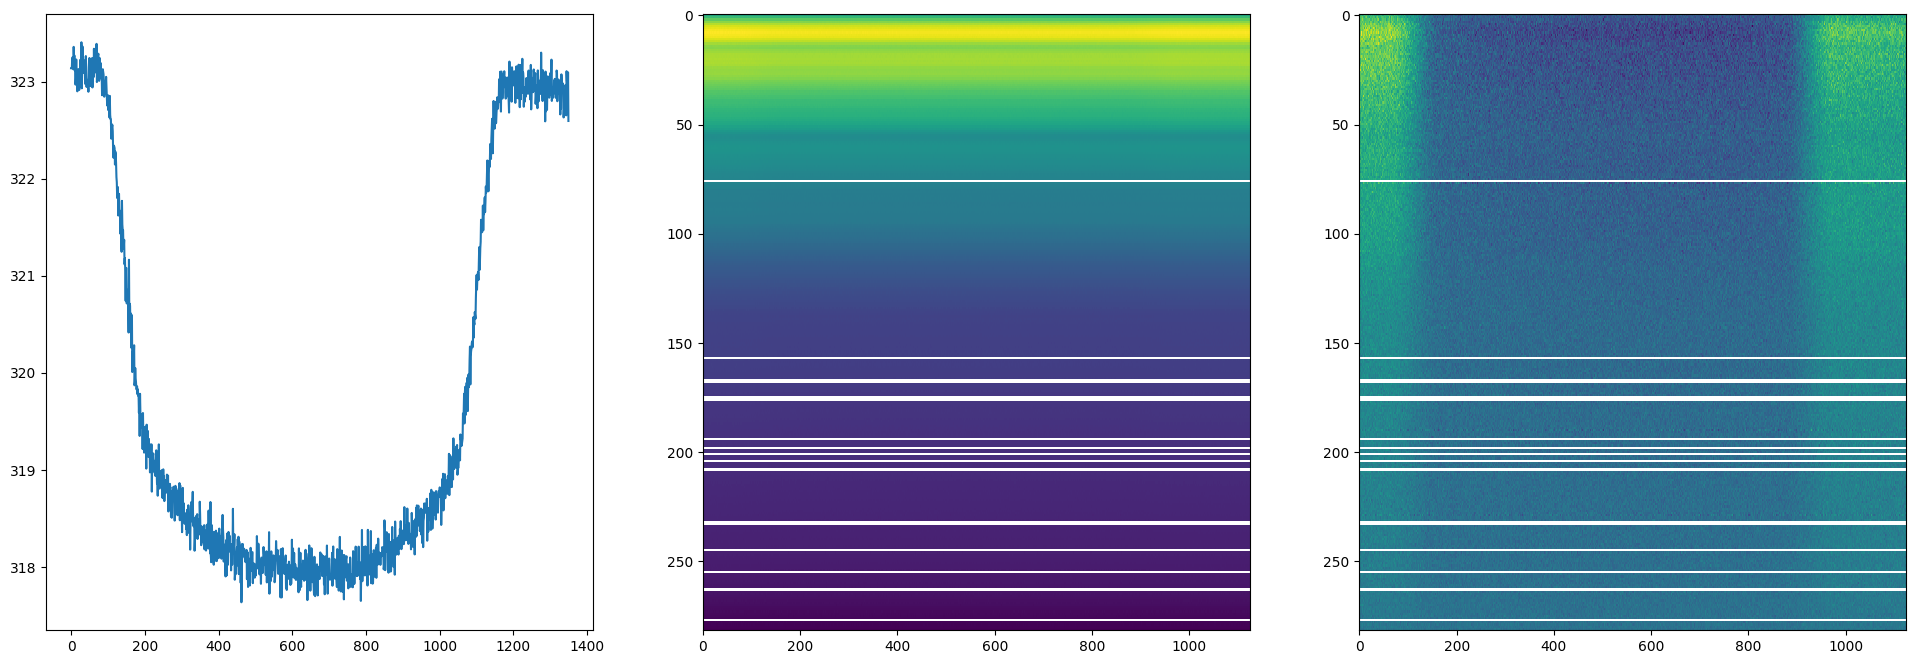

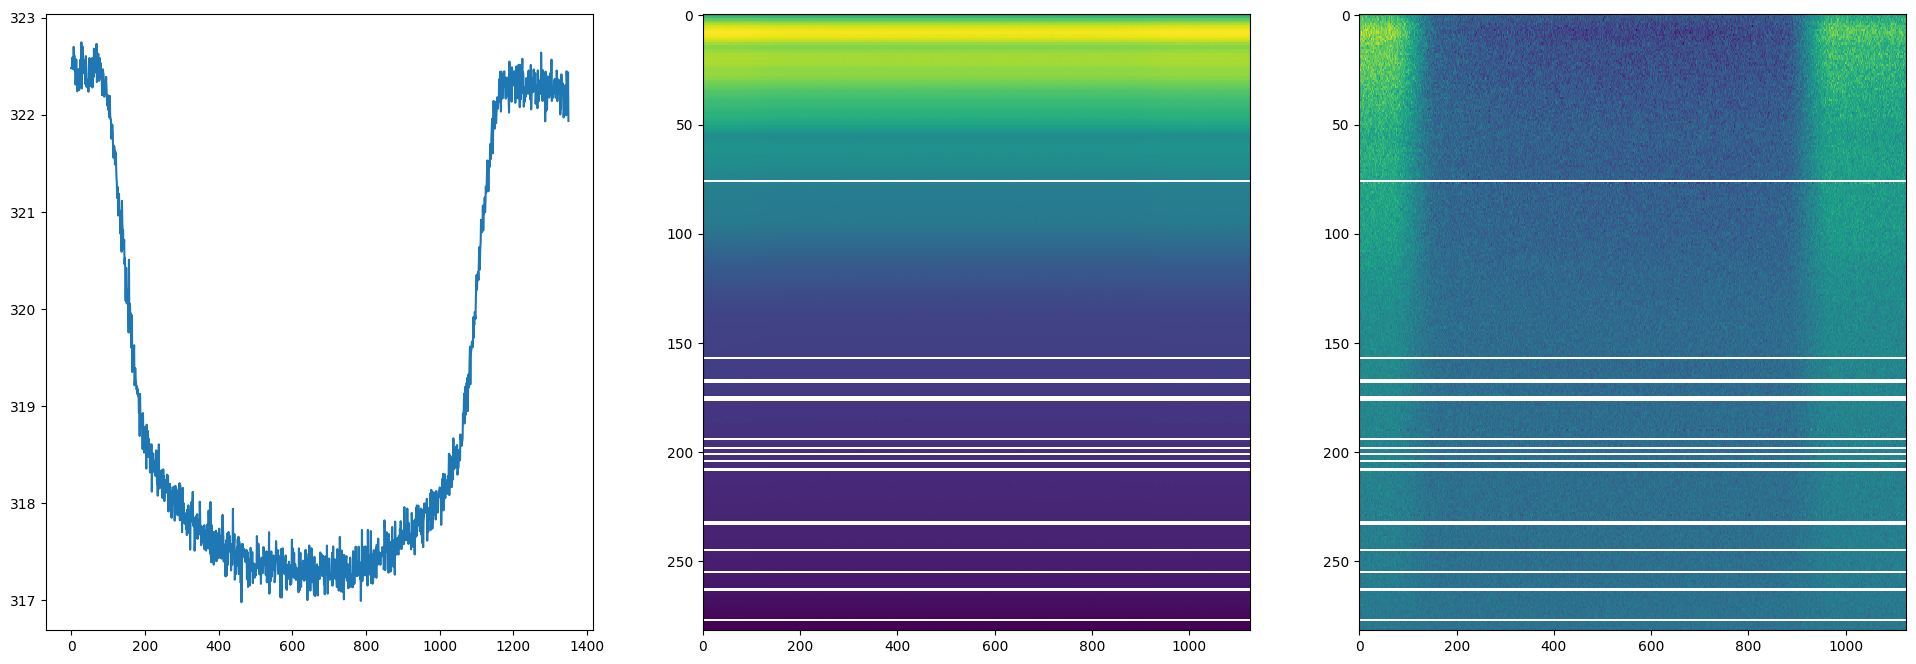

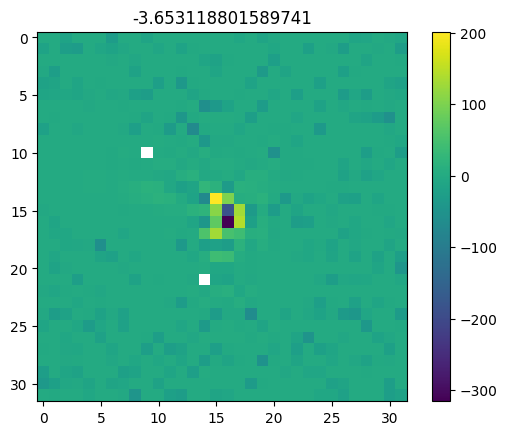

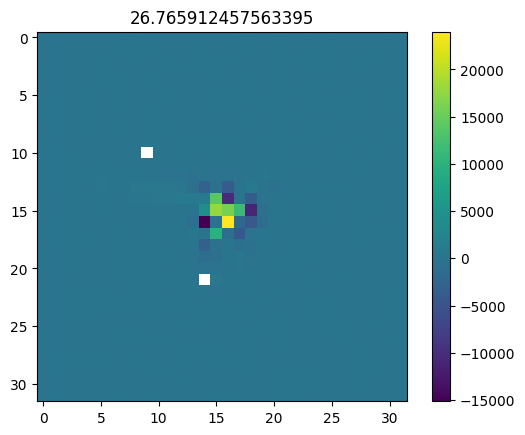

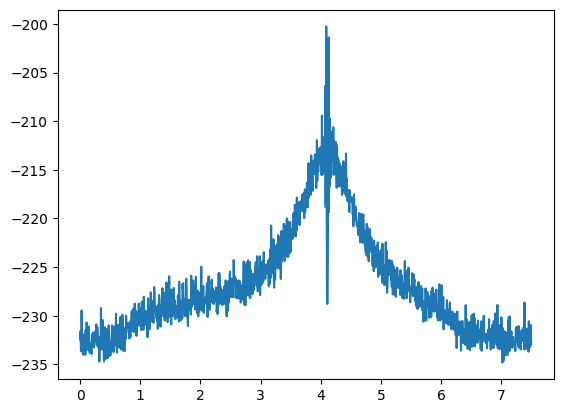

min 0.0 0.0
286698.64622856746


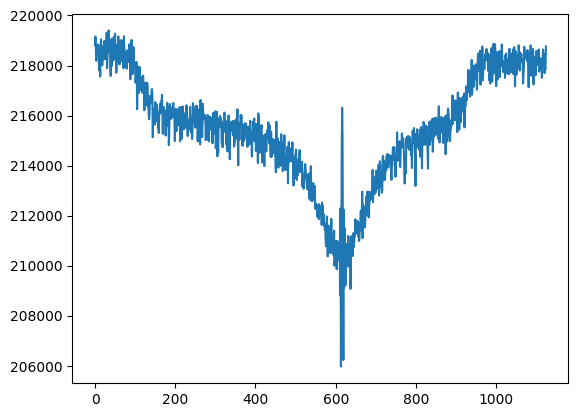

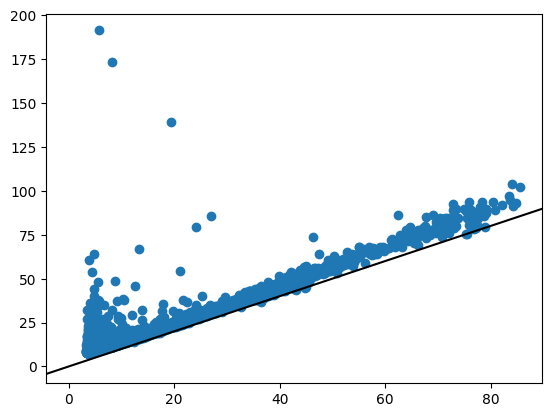

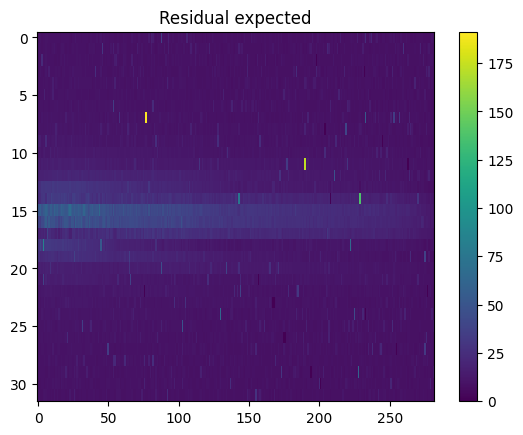

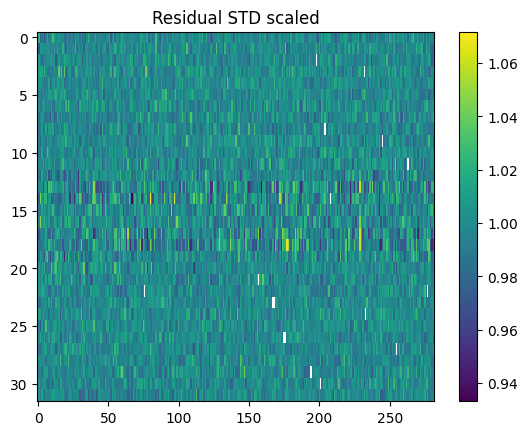

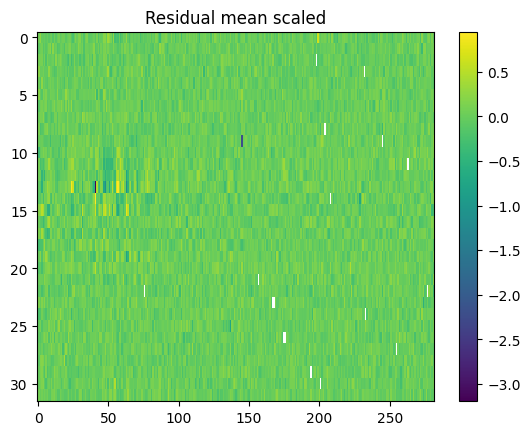

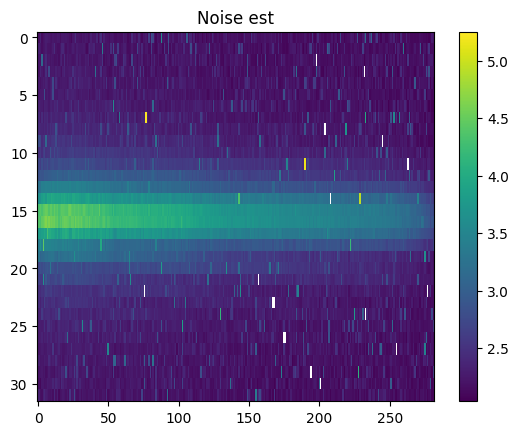

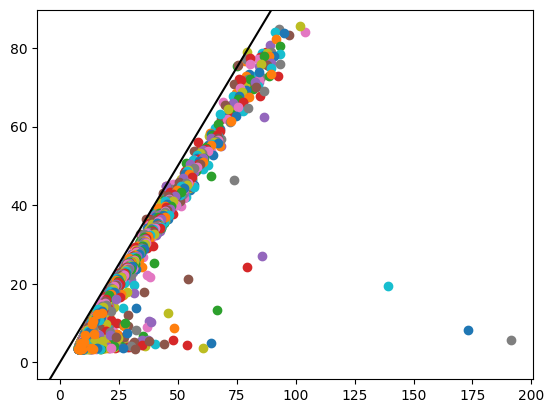

In [4]:
import ariel_load
importlib.reload(ariel_load)
importlib.reload(ariel_load_FGS)
loaders = ariel_load.default_loaders()
loaders[0].cache_steps = []
loaders[1].apply_pixel_corrections.mask_hot = False
d = copy.deepcopy(data[0])
#d.transits = d.transits[1:]
#d.transits[0].observation_number = 1
ariel_load.raw_data_diagnostics(copy.deepcopy(d), 0, loaders)
print(d.transits[0].data[0].data.flatten()[0])